# <span style="color:yellow"> Numerical Simulation Laboratory </span>
## <span style="color:blue"> Lezione 1 </span>

### Esericizio 01.1
**Obiettivi:**
- testare il generatore di numeri pseudo-casuali
- stimare il valor medio $<r>$ dei numeri estratti e verificare che sia pari a $1/2$
- suddividere il calcolo in blocchi e stimare l'incertezza di $<r>$ con la deviazione standard della media in funzione del numero di blocchi

Durante l'esperimento vengono estratti $M=10^5$ numeri casuali divisi in $N=10^2$ blocchi.
Per ogni blocco $N_i$ viene calcolata la media $<r_i>$ dei numeri estratti e il risultato finale consiste nella media dei $<r_i>$ con errore pari alla deviazione standard della media: 
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N <r^2_i> - \left( \frac{1}{N} \sum_{i=1}^N <r_i> \right)^2 \right]} $$

*Nota sul codice:*
Il codice utilizza una formula ricorsiva per calcolare la media totale e la deviazione standard della media senza impiegare vettori ausiliari.
In questo modo è possibile osservare come varia la distribuzione della media al procedere dell'esperimento e all'aumentare del numero dei blocchi.

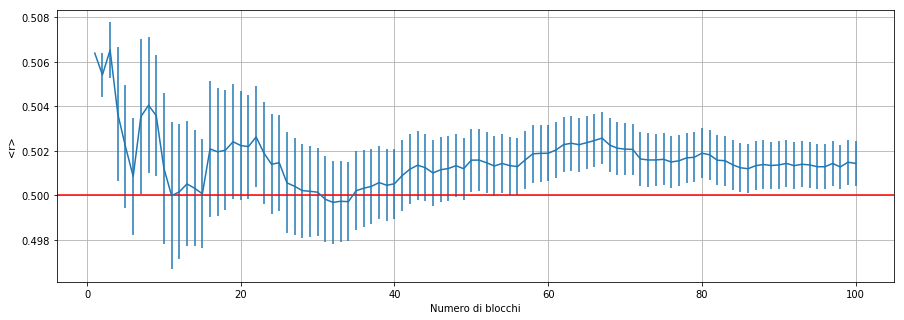

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#attenzione: r prima della stringa per leggere tutto come una stringa
#attenzione: files devono avere dati separati da uno spazio e non da un tab!!
fig=plt.figure(figsize=(15,5))

N_blocchi, r_medio, error = np.loadtxt(r"Data/average.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N_blocchi,r_medio,yerr=error)
plt.xlabel('Numero di blocchi')
plt.ylabel('<r>')
plt.axhline(y=0.5,color='r')
plt.grid(True)

plt.show()

### Esericizio 01.2
**Obiettivi:**
- testare il generatore di numeri pseudo-casuali
- stimare il valor medio $<\sigma^2>$ dei numeri estratti, con  $\sigma^2 = \int_0^1 (r-1/2)^2 dr$, e verificare che sia pari a $1/12$
- suddividere il calcolo in blocchi e stimare l'incertezza di $<\sigma^2>$ con la deviazione standard della media in funzione del numero di blocchi

Come per l'esercizio 01.1, durante l'esperimento vengono estratti $M=10^5$ numeri casuali divisi in $N=10^2$ blocchi.
Per ogni blocco $N_i$ viene calcolata la media $<\sigma^2_i>$ dei numeri estratti e il risultato finale consiste nella media dei $<\sigma^2_i>$ con errore pari alla deviazione standard della media.

*Nota sul codice:*
Il codice utilizza una formula ricorsiva per calcolare la media totale e la deviazione standard della media senza impiegare vettori ausiliari.
In questo modo è possibile osservare come varia la distribuzione della media al procedere dell'esperimento e all\'aumentare del numero dei blocchi.

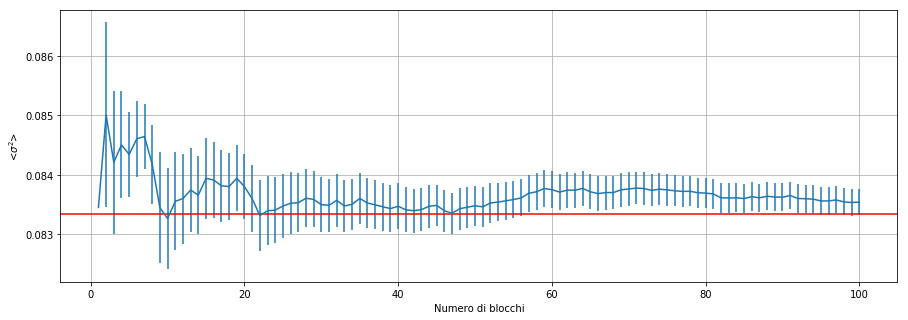

In [2]:
fig=plt.figure(figsize=(15,5))

N_blocchi, s_medio, error = np.loadtxt(r"Data/variance.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N_blocchi,s_medio,yerr=error)
plt.xlabel('Numero di blocchi')
plt.ylabel('<$\sigma^2$>')
plt.axhline(y=1/12,color='r')
plt.grid(True)
plt.show()

### Esericizio 01.3
**Obiettivi:**
- testare il generatore di numeri pseudo_casuali
- eseguire il test del $\chi^2$ sull'intervallo [0,1]

L'intervallo [0,1] viene suddiviso in $M=10^2$ intervalli identici, $N=10^4$ numeri casuali vengono estratti e assegnati al sottointervallo al quale appartengono riempiendo così un istogramma.
Viene poi eseguito il test del $\chi^2$ confrontando il numero $n_i$ di elementi che appartengono ad ogni sottointervallo con il valore di aspettazione pari a $E_i=N/M$.
L'esperimento viene eseguito $J=100$ volte, il grafico rappresenta gli esiti dei J esperimenti.

*Osservazione*: nella formula per il calcolo del $\chi^2$: $$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$ 
$E_i=N/M$ è costante e corrisponde al valore di aspettazione di conteggio per ogni sottointervallo


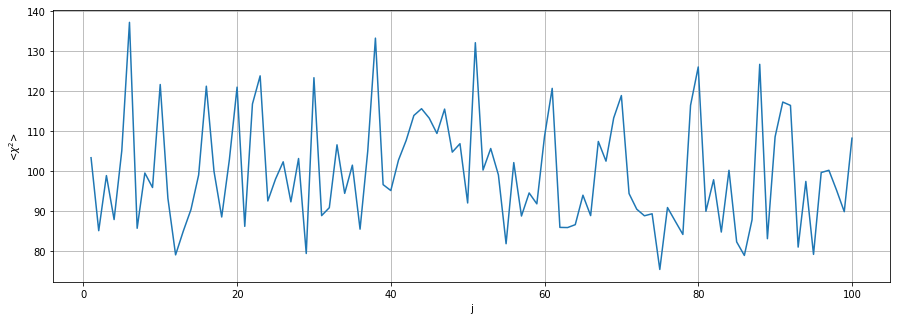

In [3]:
fig=plt.figure(figsize=(15,5))

N, chi = np.loadtxt(r"Data/chi_squares.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(N,chi)
plt.xlabel('j')
plt.ylabel('<$\chi^2$>')

plt.grid(True)
plt.show()

### Esericizio 02
**Obiettivi:**
- implementare un generatore a distribuzione esponenziale e Lorentziana sfruttando il generatore di numeri pseudo-casuali uniformi
- verificare il teorema del limite centrale per la distribuzione uniforme ed esponenziale e l'estensione del teorema per la distribuzione Lorentziana

Per generare una distribuzione di probabilità esponenziale $\rho(x)=\lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ utilizziamo il metodo della formula inversa:
$$x=\frac{-\log(1-y)}{\lambda}$$ con y distribuito uniformemente tra 0 e 1.

Per generare una distribuzione di probabilità di Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ utilizziamo il metodo della funzione inversa: $$x=\mu+\Gamma\cdot\tan(\pi(y-1/2)) $$ 
con y distribuito uniformemente tra 0 e 1.

Per ciascuna delle tre distribuzioni (uniforme, esponenziale, lorentziana) calcolo su $J=10^4$ blocchi la somma dei $N$ numeri estratti per ogni blocco $$ S_N = \frac{1}{N}\sum_{i=1}^N x_i $$
con $N=1,2,10,100$, ottenendo così 4 istogrammi per ciascuna distribuzione.

Osservo che, all'aumentare di $N$, le distribuzioni delle $S_N$ dei generatori uniforme ed esponenziale tendono ad una Gaussiana, mentre la distribuzione delle $S_N$ lorentziane tendono anch'esse ad una lorentziana.

*Nota:* $\lambda=1, \mu=0, \Gamma=1$

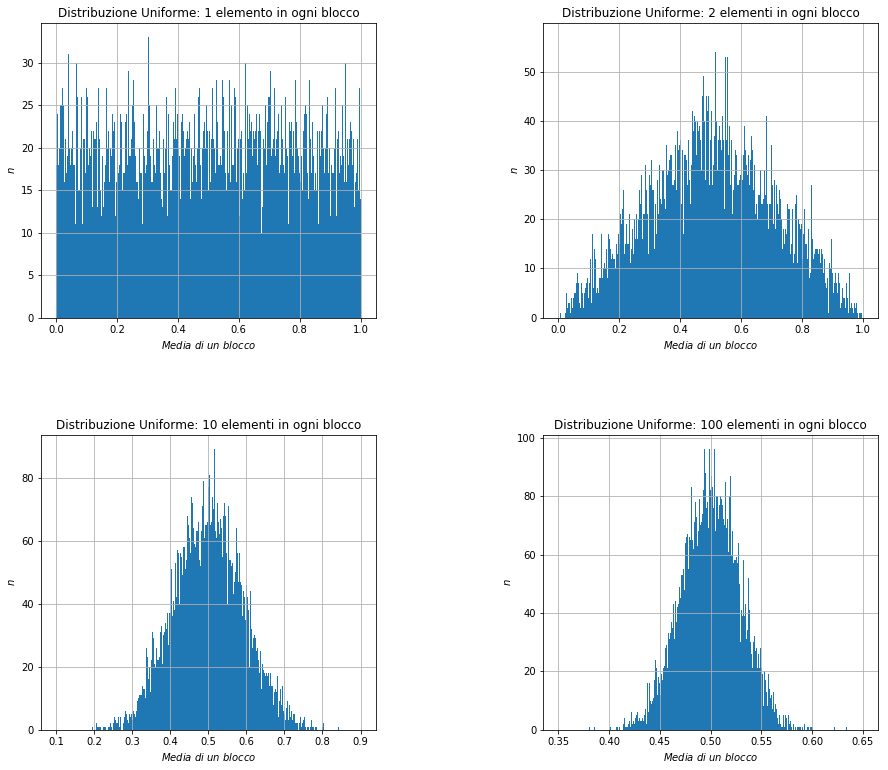

In [4]:
fig=plt.figure(figsize=(15, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.5)          #spazio tra due grafici vicini

n_bins = 500

plt.subplot(2,2,1)                                   #n_colonne totali; n_righe totali; indice del grafico considerato
unif_1 = np.loadtxt("Data/unif_1.dat", unpack='true')
plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Uniforme: 1 elemento in ogni blocco')
plt.grid(True)
plt.hist(unif_1, n_bins, range=(0,1))

plt.subplot(2,2,2)
unif_2 = np.loadtxt("Data/unif_2.dat", unpack='true')
plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Uniforme: 2 elementi in ogni blocco')
plt.grid(True)
plt.hist(unif_2, n_bins, range=(0,1))

plt.subplot(2,2,3)
unif_10 = np.loadtxt("Data/unif_10.dat", unpack='true')
plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Uniforme: 10 elementi in ogni blocco')
plt.grid(True)
plt.hist(unif_10, n_bins, range=(0.1,0.9))

plt.subplot(2,2,4)
unif_100 = np.loadtxt("Data/unif_100.dat", unpack='true')
plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Uniforme: 100 elementi in ogni blocco')
plt.grid(True)
plt.hist(unif_100, n_bins, range=(0.35,0.65))

plt.show()

[8.24557955e+01 2.91174429e-02 5.00087757e-01]


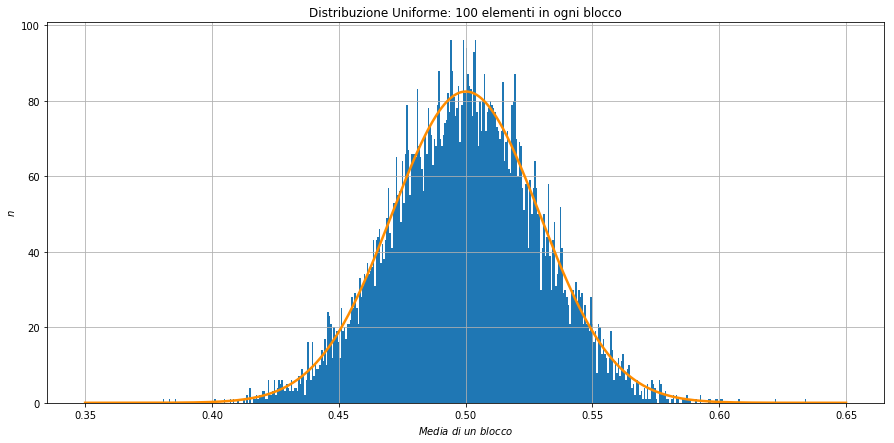

In [8]:
from scipy.optimize import curve_fit
from scipy import stats  

def f(x,N,s,mean):  #Gaussiana
    return N*np.exp(-(1./(2.*s*s))*(x-mean)**2)

fig=plt.figure(figsize=(15, 7))                     #sx: larghezza; dx: Lunghezza

bins = np.linspace(0.35, 0.65, n_bins)
data_entries, bins_1 = np.histogram(unif_100, bins=bins)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])  #vettore con posizioni == centro dei bin
popt, pcov = curve_fit(f, xdata=binscenters, ydata=data_entries) 
print(popt)
xspace = np.linspace(0.35, 0.65, 100000)
#plt.bar(binscenters, data_entries, width=bins[1] - bins[0], color='navy', label=r'Histogram entries')
plt.plot(xspace, f(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')

plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Uniforme: 100 elementi in ogni blocco')
plt.grid(True)
plt.hist(unif_100, n_bins, range=(0.35,0.65))

plt.show()

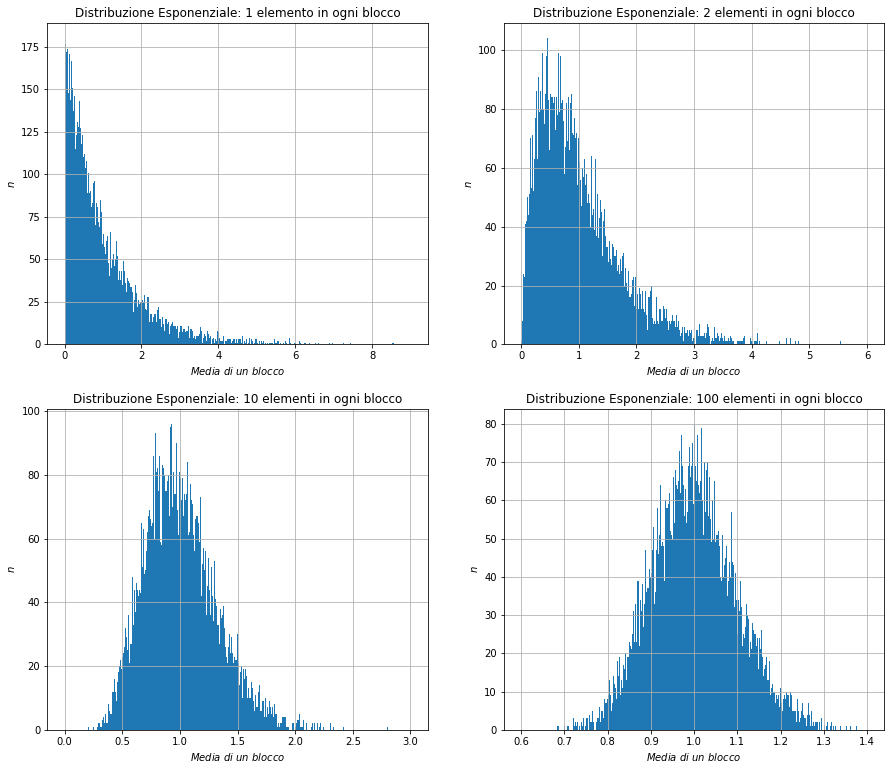

In [11]:
fig.subplots_adjust(hspace=0.4, wspace=0.5)
fig=plt.figure(figsize=(15, 13))

n_bins = 500

plt.subplot(2,2,1)
exp_1 = np.loadtxt("Data/exp_1.dat", unpack='true')
plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Esponenziale: 1 elemento in ogni blocco')
plt.grid(True)
plt.hist(exp_1, n_bins, range=(0,9))

plt.subplot(2,2,2)
exp_2 = np.loadtxt("Data/exp_2.dat", unpack='true')
plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Esponenziale: 2 elementi in ogni blocco')
plt.grid(True)
plt.hist(exp_2, n_bins, range=(0,6))

plt.subplot(2,2,3)
exp_10 = np.loadtxt("Data/exp_10.dat", unpack='true')
plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Esponenziale: 10 elementi in ogni blocco')
plt.grid(True)
plt.hist(exp_10, n_bins, range=(0,3))

plt.subplot(2,2,4)
exp_100 = np.loadtxt("Data/exp_100.dat", unpack='true')
plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Esponenziale: 100 elementi in ogni blocco')
plt.grid(True)
plt.hist(exp_100, n_bins, range=(0.6,1.4))

plt.show()

[65.25840995 -0.09770852  0.99405158]


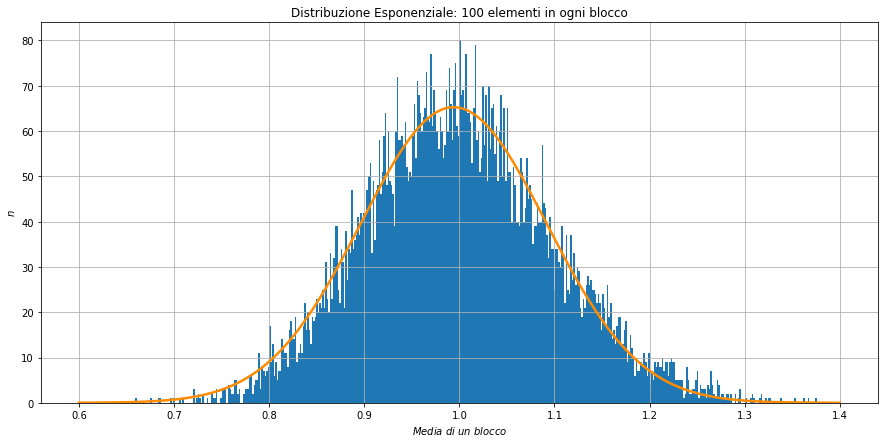

In [15]:
fig=plt.figure(figsize=(15, 7))                     #sx: larghezza; dx: Lunghezza

bins = np.linspace(0.6, 1.4, n_bins)
data_entries, bins_1 = np.histogram(exp_100, bins=bins)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])  #vettore con posizioni == centro dei bin
popt, pcov = curve_fit(f, xdata=binscenters, ydata=data_entries) 
print(popt)
xspace = np.linspace(0.6, 1.4, 100000)
#plt.bar(binscenters, data_entries, width=bins[1] - bins[0], color='navy', label=r'Histogram entries')
plt.plot(xspace, f(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')

plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Esponenziale: 100 elementi in ogni blocco')
plt.grid(True)
plt.hist(exp_100, n_bins, range=(0.6,1.4))

plt.show()

<Figure size 1080x504 with 0 Axes>

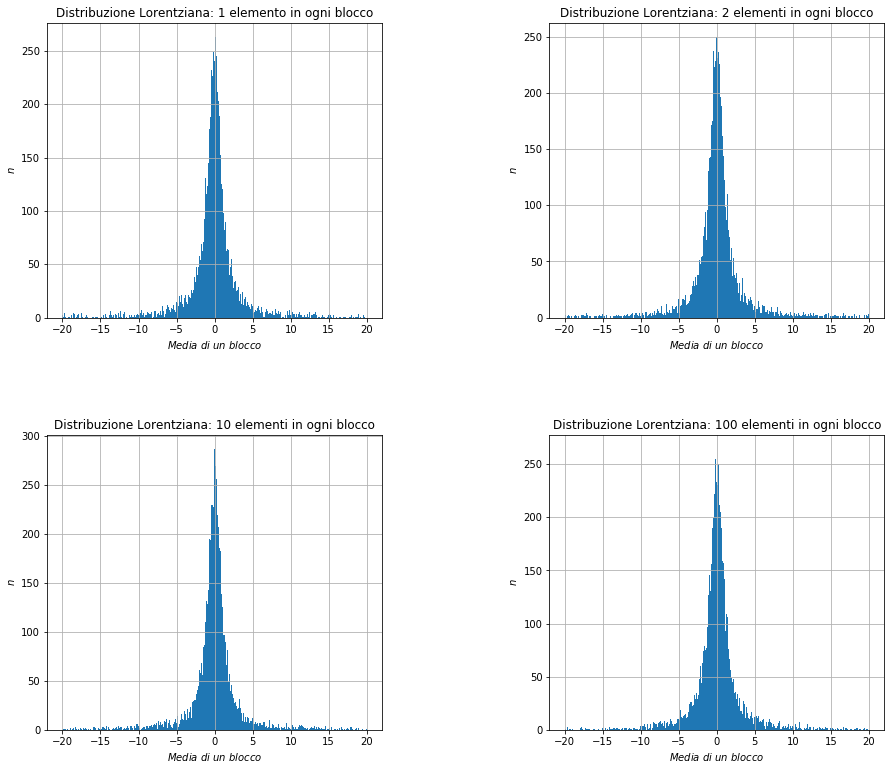

In [18]:
fig=plt.figure(figsize=(15, 13))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

n_bins = 500

plt.subplot(2,2,1)
lor_1 = np.loadtxt("Data/lor_1.dat", unpack='true')
plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Lorentziana: 1 elemento in ogni blocco')
plt.grid(True)
plt.hist(lor_1, n_bins, range=(-20,20))

plt.subplot(2,2,2)
lor_2 = np.loadtxt("Data/lor_2.dat", unpack='true')
plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Lorentziana: 2 elementi in ogni blocco')
plt.grid(True)
plt.hist(lor_2, n_bins, range=(-20,20))

plt.subplot(2,2,3)
lor_10 = np.loadtxt("Data/lor_10.dat", unpack='true')
plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Lorentziana: 10 elementi in ogni blocco')
plt.grid(True)
plt.hist(lor_10, n_bins, range=(-20,20))

plt.subplot(2,2,4)
lor_100 = np.loadtxt("Data/lor_100.dat", unpack='true')
plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Lorentziana: 100 elementi in ogni blocco')
plt.grid(True)
plt.hist(lor_100, n_bins, range=(-20,20))

plt.show()

[ 2.49368760e+02  2.24640157e-02 -1.03125332e+00]


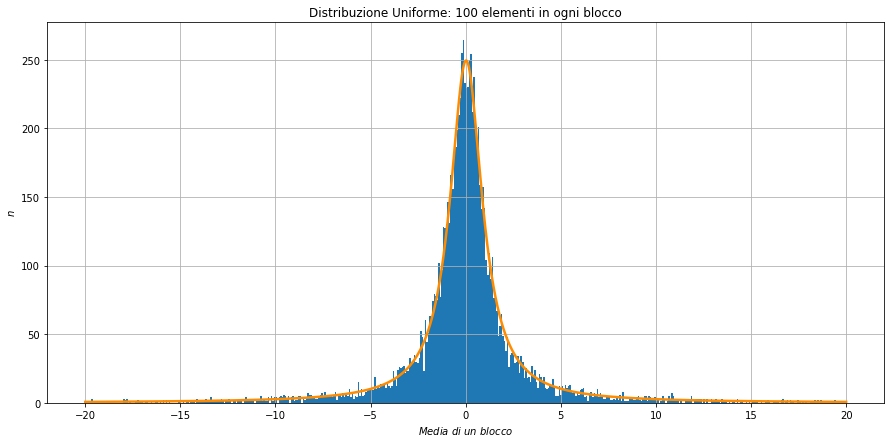

In [19]:
def f(x,N,a,b):  #Lorentziana
    return N*b*b/((x-a)**2 + b**2)

fig=plt.figure(figsize=(15, 7))                     #sx: larghezza; dx: Lunghezza

bins = np.linspace(-20,20, n_bins)
data_entries, bins_1 = np.histogram(lor_100, bins=bins)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])  #vettore con posizioni == centro dei bin
popt, pcov = curve_fit(f, xdata=binscenters, ydata=data_entries) 
print(popt)
xspace = np.linspace(-20, 20, 100000)
#plt.bar(binscenters, data_entries, width=bins[1] - bins[0], color='navy', label=r'Histogram entries')
plt.plot(xspace, f(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')

plt.xlabel(r'$Media\ di\ un\ blocco$')
plt.ylabel(r'$n$')
plt.title('Distribuzione Uniforme: 100 elementi in ogni blocco')
plt.grid(True)
plt.hist(lor_100, n_bins, range=(-20, 20))

plt.show()

### Esericizio 03
**Obiettivi:**
- stimare il valore di $\pi$ attraverso l'esperimento dell'ago di Buffon

Lanciando un ago di lunghezza $L$ su un piano orizzontale diviso in fasce di larghezza $d$ è possibile stimare il valore di $pi$ attraverso la formula: $$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
dove $P=\frac{N_{hit}}{N_{thr}}$ è la probabilità che l'ago intersechi una linea del piano.

*Nota:* la formula qui riportata è valida se $L<d$.
Nella realizzazione dell'esperimento sono stati utilizzati i dati: $L=3.5 cm$ e $d=5 cm$.

Innanzitutto, indichiamo con x il centro di massa dell\'ago. Esso è distribuito uniformemente nell'intervallo $[0,\frac{d}{2}]$, dove la linea si trova in $x=0$.

Se $x>\frac{L}{2}$ l'ago non interseca la linea del piano, altrimenti la condizione per l'intersezione tra ago e linea è: $$\cos(\theta)=\frac{L}{2d}$$
con $\theta \in [0,\frac{\pi}{2}]$ pari all'angolo tra la direzione dell'asse x e l'ago stesso.

*Osservazione:* l'esperimento consiste nella stima di $\pi$, dunque non si può utilizzare il valore di $\pi$, noto a priori, per estrarre $\theta$.
Vengono dunque estratti una coppia di numeri $x,y \in [0,1]$ e, se essi appartengono alla circonferenza di raggio unitario, viene calcolato il valore di $cos{\theta}=\frac{x}{\sqrt{x^2+y^2}}$

*Nota:* La distribuzione di $\theta$ **non** è uniforme!

L'esperimento è stato eseguito con un numero totale di $M=10^5$ lanci suddivisi in $N=10^2$ blocchi. Di seguito è riportato il grafico del valor medio di $\pi$ calcolato all'aumentare del numero di blocchi con il relativo errore, corrispondente alla deviazione standard della media.

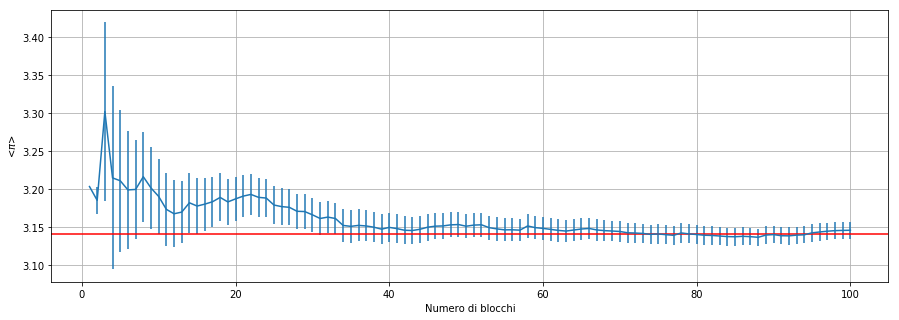

In [16]:
fig=plt.figure(figsize=(15, 5))

N_blocchi, pi_medio, error = np.loadtxt(r"Data/Buffon.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N_blocchi,pi_medio,yerr=error)
plt.xlabel('Numero di blocchi')
plt.ylabel('<$\pi$>')
plt.axhline(y=np.pi,color='r')
#attenzione: punti troppo densi... diminuire il campionamento o plottare ogni 10 blocchi...

plt.grid(True)
plt.show()